# Aliens vs Predators

In this notebook, we will try to classify some extraterrestrial beings!<br>

We have provided a dataset of 899 images of Aliens and Predators and we need to build a Convolutional Neural Network classifier to classify the two images.

The images are available with the following link.
https://www.dropbox.com/s/bvp753qskbaz20z/alien-vs-predator-images.zip

It has been split into folder structures of train and validation each containing folders for images of aliens and predators. Lets get started! 

## Table of Contents

1. [Downloading the dataset](#download)
2. [Unzip the dataset](#unzip)
3. [Importing the packages](#import)
4. [Batch Processing Images](#batch)
5. [Build the model](#build)
6. [Train the model](#train)
7. [Model Prediction](#predict)

### 1. Downloading the dataset  <a id='download'>

In [ ]:
!wget -q https://www.dropbox.com/s/bvp753qskbaz20z/alien-vs-predator-images.zip

### 2. Unzip the dataset   <a id='unzip'>

In [ ]:
!unzip alien-vs-predator-images.zip > /dev/null; echo " done."

 done.


In [ ]:
!ls -R | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

   .
   |-alien-vs-predator-images
   |---data
   |-----train
   |-------alien
   |-------predator
   |-----validation
   |-------alien
   |-------predator
   |-sample_data


### 3. Importing packages   <a id='import'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## 4. Batch Processing of Images   <a id='batch'>

Using ImageDataGenerator, we will read the images using flow_from_directory.<br>
We will perform basic image processing techniques on train data such as:
- Rescaling
After this, we will convert the images into 150x150 pixel color images for training.<br>
These images will be passed to the model with batch size of 32.

In [ ]:
#create a data generator object for train and test to load data
batch_size=32
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.25,
    shear_range=0.45,
    fill_mode='nearest'
)

val_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_generator=train_datagen.flow_from_directory('alien-vs-predator-images/data/train',
                                                  target_size=(150,150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
validation_generator=val_datagen.flow_from_directory('alien-vs-predator-images/data/validation',
                                                     target_size=(150,150),
                                                     batch_size=batch_size,
                                                     class_mode='categorical')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


predator


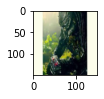

alien


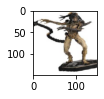

alien


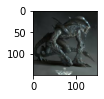

In [ ]:
#Display images from training folder
# **add subplot in the below fig
x,y=train_generator.next()

for i in range(0,3):
  image = x[i]
  label = y[i]
  plt.subplot2grid((3,3),(1,i))
  print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(np.argmax(label))])
  plt.imshow(image)
  plt.show()

## 5. Build the model  <a id='build'>

After preprocessing the image the time has come to build our Convolutional Neural Network Classifier which can classify the images of Aliens and Predators. We will use a lot of different types of layers to build our model such as 
- Convolutional layer
- Max Pooling layer
- Dense layer

We will use Adam as our optimizer. <br>

In [ ]:
tf.keras.backend.clear_session()
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3),input_shape=(150,150,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0

In [ ]:
#Checkpoint
filepath="weights.aliens.preprocess.best.hdf5"
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,save_best_only=True,mode='max')

In [ ]:
#TensorBoard
log_dir='./tf-log/alien_v4'
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://addea9011040.ngrok.io


### 6. Train the model   <a id='train'>

In [ ]:
batch_size=32
fitted_model = model.fit_generator(
        train_generator,
        steps_per_epoch= int(train_generator.samples) // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps= int(validation_generator.samples) // batch_size,
        callbacks=[tb_cb,checkpoint]
        )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
 1/21 [>.............................] - ETA: 0s - loss: 0.7076 - accuracy: 0.4688WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
21/21 [==============================] - 4s 211ms/step - loss: 1.2083 - accuracy: 0.4940 - val_loss: 0.6927 - val_accuracy: 0.4948
Epoch 2/50
21/21 [==============================] - 4s 206ms/step - loss: 0.6899 - accuracy: 0.5332 - val_loss: 0.6862 - val_accuracy: 0.5625
Epoch 3/50
21/21 [==============================] - 4s 210ms/step - loss: 0.6647 - accuracy: 0.5634 - val_loss: 0.6189 - val_accuracy: 0.6458
Epoch 4/50
21/21 [==============================] - 4s 209ms/step - loss: 0.6223 - accuracy: 0.6390 - val_loss: 0.6150 - val_accuracy: 0.6

In [ ]:
batch_size=32
fitted_model = model.fit_generator(
        train_generator,
        steps_per_epoch= int(train_generator.samples) // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps= int(validation_generator.samples) // batch_size,
        callbacks=[tb_cb,checkpoint],
        initial_epoch=50
        )

Epoch 51/100
21/21 [==============================] - 4s 209ms/step - loss: 0.3779 - accuracy: 0.8233 - val_loss: 0.5501 - val_accuracy: 0.7708
Epoch 52/100
21/21 [==============================] - 4s 204ms/step - loss: 0.3894 - accuracy: 0.8157 - val_loss: 0.5464 - val_accuracy: 0.7812
Epoch 53/100
21/21 [==============================] - 4s 203ms/step - loss: 0.3746 - accuracy: 0.8353 - val_loss: 0.4805 - val_accuracy: 0.7865
Epoch 54/100
21/21 [==============================] - 4s 203ms/step - loss: 0.3675 - accuracy: 0.8399 - val_loss: 0.5097 - val_accuracy: 0.7969
Epoch 55/100
21/21 [==============================] - 4s 209ms/step - loss: 0.3687 - accuracy: 0.8233 - val_loss: 0.5734 - val_accuracy: 0.7812
Epoch 56/100
21/21 [==============================] - 4s 204ms/step - loss: 0.3598 - accuracy: 0.8308 - val_loss: 0.6495 - val_accuracy: 0.7396
Epoch 57/100
21/21 [==============================] - 4s 203ms/step - loss: 0.3432 - accuracy: 0.8248 - val_loss: 0.5570 - val_accuracy:

### 7.Model Prediction

In [ ]:
def predict_image(model,image_file_name):
  
  classifier=model

  img = tf.keras.preprocessing.image.load_img(image_file_name,target_size=(150, 150))
  img_arr = tf.keras.preprocessing.image.img_to_array(img)/255

  x=img_arr.reshape(1,150,150,3) 
  plt.imshow(img)

  result = classifier.predict(x)
  print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(np.argmax(result))])

In [ ]:
!wget -q https://www.dreadcentral.com/wp-content/uploads/2018/06/Predator-1.jpg

!wget -q https://www.bleedingcool.com/wp-content/uploads/2018/06/NECA-Predator-2018-Film-Figure-3.jpg
  
!wget -q https://cdn.shopify.com/s/files/1/0474/7237/products/neca-alien-avp-series-7-warrior-alien-9-action-figure-pre-order-ships-april-2_1024x1024.jpg

predator


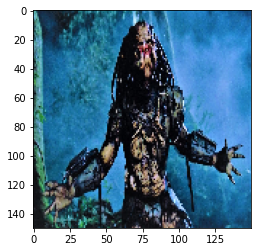

In [ ]:
predict_image(model,'Predator-1.jpg')

predator


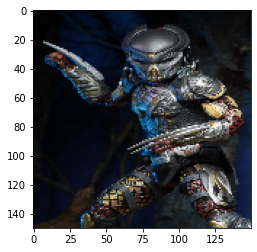

In [ ]:
predict_image(model,'NECA-Predator-2018-Film-Figure-3.jpg')

alien


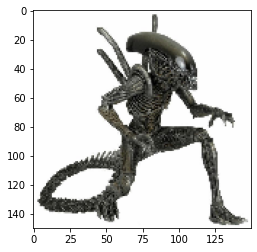

In [ ]:
predict_image(model,'neca-alien-avp-series-7-warrior-alien-9-action-figure-pre-order-ships-april-2_1024x1024.jpg')